<a href="https://colab.research.google.com/github/RadhikaSoodGit/IMChatbot/blob/main/accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
#from contractions import contractions_dict # to solve contractions
#from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import re
import gc
import numpy  as np
import pandas as pd

import wordcloud as wc
import plotly.express as px
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Questions_DS.csv')
df['Intent'].value_counts()

INFORMATION    2349
QUANTITY        799
SO              711
PO              621
COST            412
ORDER           387
LOCATION        345
DATE              9
VENDOR            2
Name: Intent, dtype: int64

In [64]:
df.head()

,Text,Intent
0,I want to know details about a ITEM?,INFORMATION
1,I want to know details about these ITEMS?,INFORMATION
2,I want to know location of the ITEM?,LOCATION
3,I want to know the storage place of the ITEM?,LOCATION
4,I want to know the how much quantity we have f...,QUANTITY


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5635 non-null   object
 1   Intent  5635 non-null   object
dtypes: object(2)
memory usage: 88.2+ KB


In [66]:
df.isnull().sum()

Text      0
Intent    0
dtype: int64

In [67]:
df.shape

(5635, 2)

In [68]:
df.duplicated().sum()

0

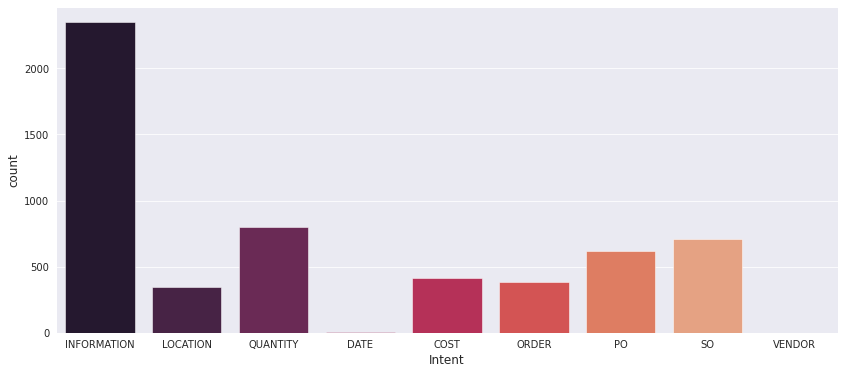

In [69]:
plt.figure(figsize=(14,6))
sns.countplot(x ='Intent',data = df,palette = 'rocket')
plt.show()

In [70]:
# Viz: label distribution
fig = px.bar(df.groupby('Intent').agg('count').reset_index().rename({'Text':'count'},axis=1).sort_values('count', ascending = False),
             x = 'Intent',
             y = 'count',
             color = 'Intent',
             opacity = 0.7,
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Label Distribution',
            )

fig.show()

In [71]:
!pip install autocorrect
!pip install unidecode 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
def case_convert():
    df.Text = [i.lower() for i in df.Text.values]

def remove_specials():
    df.Text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in df.Text.values]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in df.Text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    df.Text = texts

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in df.Text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    df.Text = texts
                
def remove_links():
    texts = []
    for text in df.Text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    df.Text = texts

def remove_accents():
    df.Text = [unidecode.unidecode(text) for text in df.Text.values]

def normalize_spaces():
    df.Text = [re.sub(r"\s+"," ",text) for text in df.Text.values]

case_convert()
remove_links()
remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
print(df)

                                                   Text       Intent
0                               want know details item   INFORMATION
1                              want know details items   INFORMATION
2                              want know location item      LOCATION
3                         want know storage place item      LOCATION
4                         want know much quantity item      QUANTITY
...                                                 ...          ...
5630                 want know much certain thing used   INFORMATION
5631              desire know many orders item receive         ORDER
5632   desire know many purchase orders created spec...  INFORMATION
5633                         need know vendor specific            SO
5634                 find additional information items   INFORMATION

[5635 rows x 2 columns]


In [73]:
lenc = LabelEncoder()
df.Intent = lenc.fit_transform(df.Intent)

In [74]:
lenc.classes_

array(['COST', 'DATE', 'INFORMATION', 'LOCATION', 'ORDER', 'PO',
       'QUANTITY', 'SO', 'VENDOR'], dtype=object)

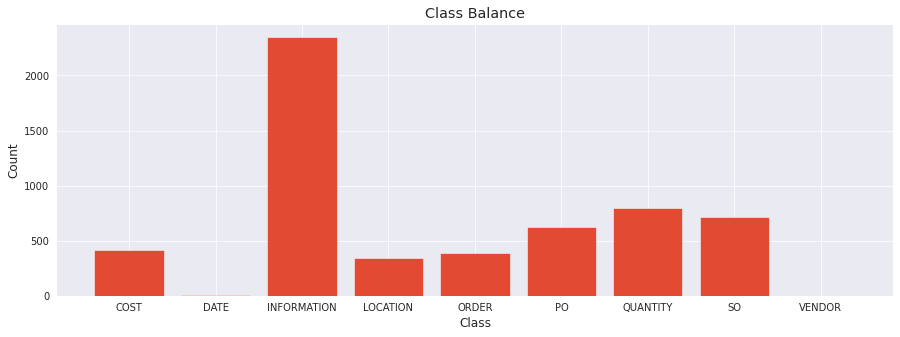

In [75]:
plt.figure(figsize=(15,5))
un, count = np.unique(df.Intent.values, return_counts=True)
plt.bar([lenc.classes_[int(i)] for i in un] , count)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

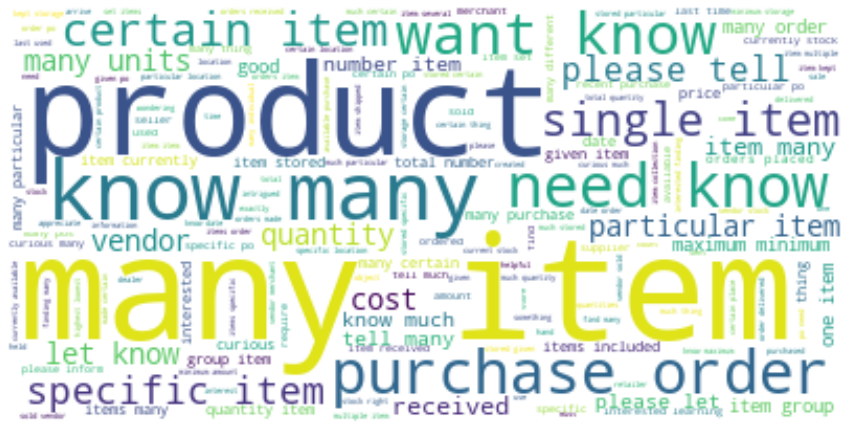

In [76]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

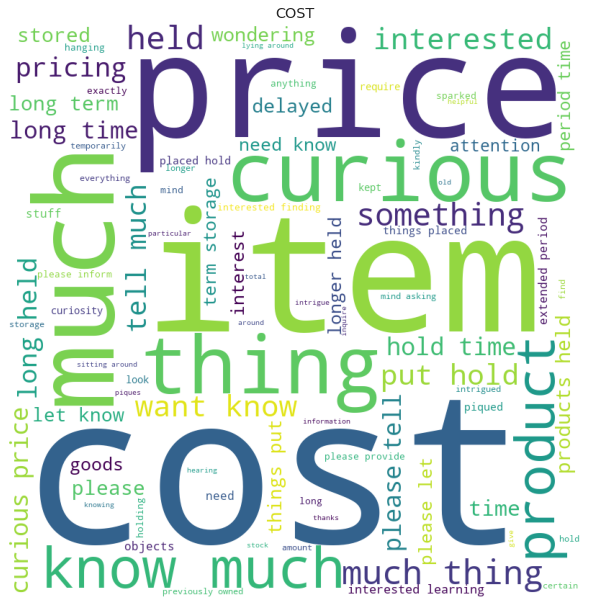

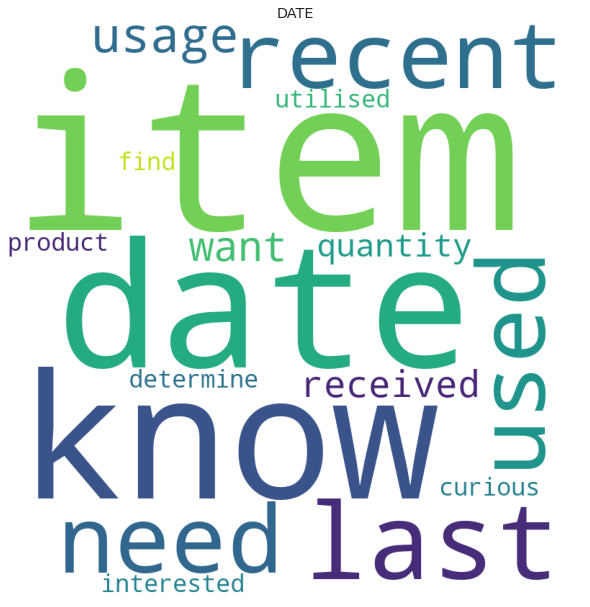

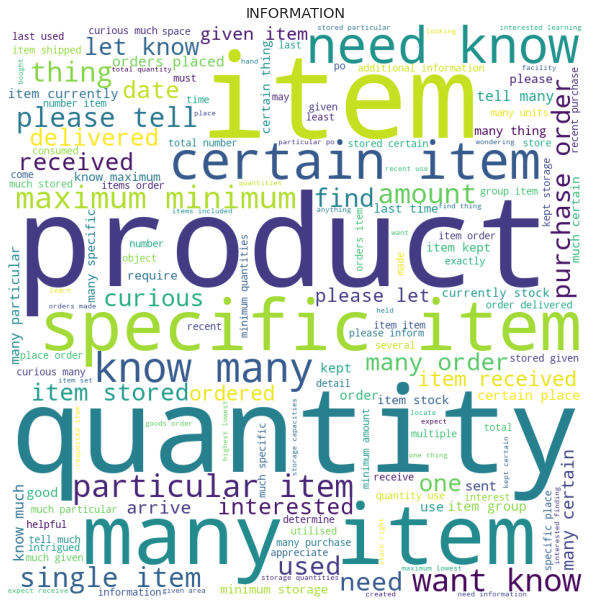

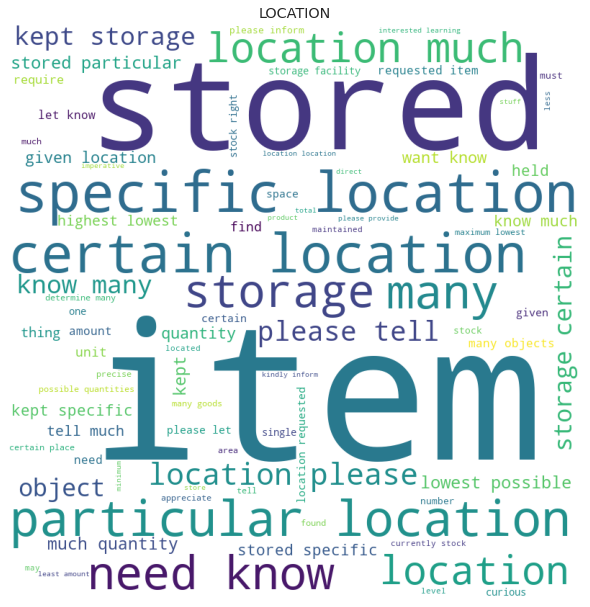

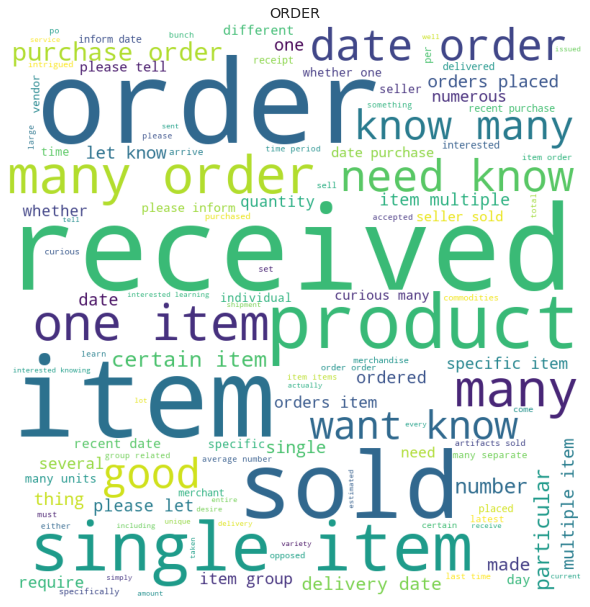

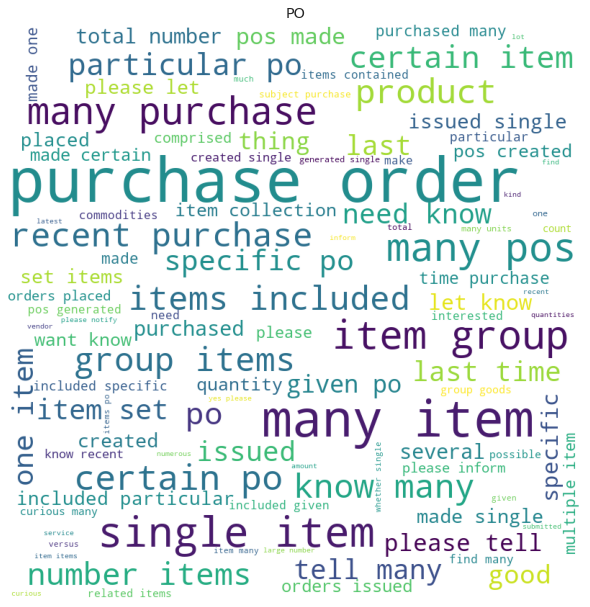

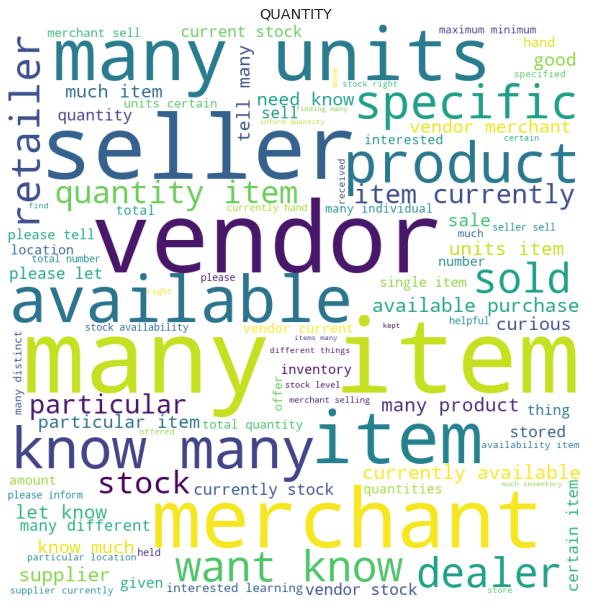

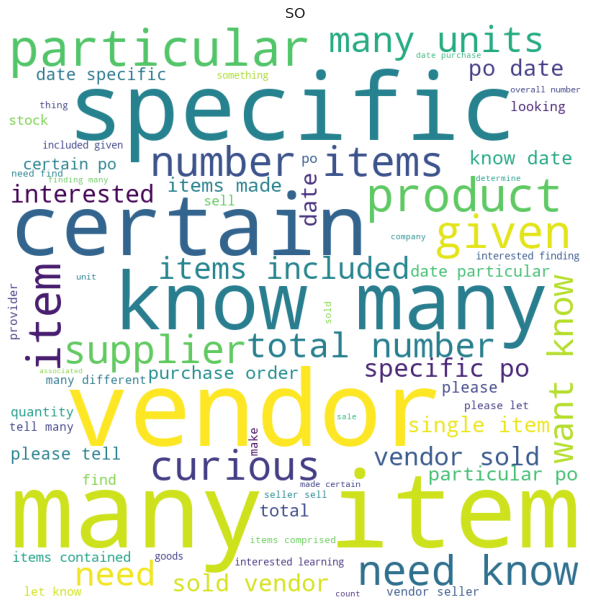

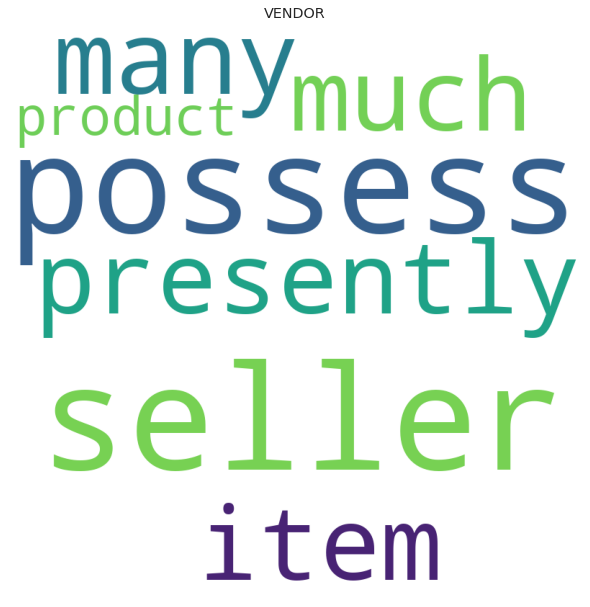

In [77]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.Intent == c].Text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

In [78]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("Intent")
df

,Text,Intent
0,want know details item,2
1,want know details items,2
2,want know location item,3
3,want know storage place item,3
4,want know much quantity item,6
...,...,...
5630,want know much certain thing used,2
5631,desire know many orders item receive,4
5632,desire know many purchase orders created spec...,2
5633,need know vendor specific,7


In [79]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
corpus

['want know detail item',
 'want know detail item',
 'want know locat item',
 'want know storag place item',
 'want know much quantiti item',
 'want know much quantiti use item',
 'want know much quantiti receiv item',
 'want know last use date item',
 'want know receiv quantiti date item',
 'want know price item',
 'want know much quantiti avail item vendor',
 'want know much quantiti avail item particular vendor',
 'want know mani order sold item',
 'want know order receiv date item multipl item',
 'want know order deliveri date item multipl item',
 'want know cost held item long time',
 'want know much quantiti store particular locat',
 'want know maximum miminum store quantiti item particular locat',
 'want know mani po creat particular item multipl item',
 'want know last po creat item multipl item',
 'want know mani quantiti item multipl item sold vendor',
 'want know date particular po',
 'want know vendor particluar',
 'want know mani item part particular',
 'want know mani ite

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [83]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from keras.models import load_model
from keras.models import Sequential

from keras.models import Sequential
from keras import layers

embedding_dim = 50
maxlen = 10000
vocab_size = 8000
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 50)         400000    
                                                                 
 flatten_1 (Flatten)         (None, 500000)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                5000010   
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,400,021
Trainable params: 5,400,021
Non-trainable params: 0
_________________________________________________________________


In [84]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [85]:
#history = model.fit(X_train, y_train,
 #                   epochs=20,
  #                  verbose=False,
   #                 validation_data=(X_test, y_test),
    #                batch_size=10)
#loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
#print("Training Accuracy: {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

In [86]:
print("Train shape:",X_train)
print("Test shape:",y_test)

Train shape: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test shape: [0 2 2 ... 2 4 4]


In [87]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [88]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
#making predictions on test data
y_predict = classifier.predict(X_test)

In [90]:
print("The predict is:",y_predict)

The predict is: [0 2 4 ... 3 4 4]


In [91]:
score=classifier.score(X_test,y_predict)
print("The Score is:",score)

The Score is: 1.0


In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131   0   6   2   0   0   2   1]
 [  0   0   2   0   0   0   0   0]
 [ 47  24 318 108 104  53  64  42]
 [  4   1  17  74   0   2   8   1]
 [  0   0  18   2  89   1   8   4]
 [  0   0  26   5  28 121   3  33]
 [  5   0  14  18  20   2 147  65]
 [  6   1   6  17  17  11  14 168]]


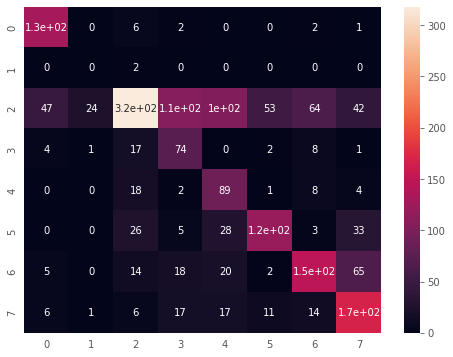

In [95]:
sns.heatmap(cm,annot =True)
plt.show()

In [96]:
from sklearn import metrics

In [97]:
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

[[131   0   6   2   0   0   2   1]
 [  0   0   2   0   0   0   0   0]
 [ 47  24 318 108 104  53  64  42]
 [  4   1  17  74   0   2   8   1]
 [  0   0  18   2  89   1   8   4]
 [  0   0  26   5  28 121   3  33]
 [  5   0  14  18  20   2 147  65]
 [  6   1   6  17  17  11  14 168]]
              precision    recall  f1-score   support

           0      0.679     0.923     0.782       142
           1      0.000     0.000     0.000         2
           2      0.781     0.418     0.545       760
           3      0.327     0.692     0.444       107
           4      0.345     0.730     0.468       122
           5      0.637     0.560     0.596       216
           6      0.598     0.542     0.569       271
           7      0.535     0.700     0.606       240

    accuracy                          0.563      1860
   macro avg      0.488     0.571     0.501      1860
weighted avg      0.643     0.563     0.569      1860



In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict, digits=3))

print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0      0.986     0.972     0.979       142
           1      0.000     0.000     0.000         2
           2      0.864     0.854     0.859       760
           3      0.764     0.757     0.761       107
           4      0.743     0.852     0.794       122
           5      0.760     0.792     0.776       216
           6      0.813     0.753     0.782       271
           7      0.755     0.771     0.763       240

    accuracy                          0.824      1860
   macro avg      0.711     0.719     0.714      1860
weighted avg      0.825     0.824     0.824      1860

[[138   0   2   0   0   0   2   0]
 [  0   0   2   0   0   0   0   0]
 [  0   2 649   9  26  41  14  19]
 [  0   0  17  81   0   4   4   1]
 [  0   0   8   2 104   1   5   2]
 [  0   0  40   2   0 171   1   2]
 [  2   0  16   7   3   3 204  36]
 [  0   0  17   5   7   5  21 185]]


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [100]:
y=df['Intent']

X.shape

(5635, 5000)

Splitting the dataset into the Training set and Test set

In [101]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [102]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(3944, 5000)
(1691, 5000)
(3944,)
(1691,)


In [103]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [104]:
count_df

,abl,abl sell,accept,acquir,actual,actual consum,actual receiv,actual use,add,addit,...,would use could,would valuabl,would want,would want inquir,would want know,would want learn,ye,ye pleas,ye pleas elabor,ye pleas tell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


K Nearest Neighbor

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X1_train, y1_train)
KNeighborsClassifier()
y1_pred = classifier.predict(X1_test)

In [107]:
acc1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy of K Nearest Neighbor: {acc1}")

Accuracy of K Nearest Neighbor: 0.5600236546422236


In [108]:
print(classification_report(y1_test, y1_pred, digits=3))

print(confusion_matrix(y1_test, y1_pred))

              precision    recall  f1-score   support

           0      0.949     0.434     0.596       129
           1      0.000     0.000     0.000         2
           2      0.495     0.950     0.651       686
           3      0.792     0.198     0.317        96
           4      0.629     0.204     0.308       108
           5      0.716     0.369     0.487       198
           6      0.937     0.234     0.375       252
           7      0.733     0.300     0.426       220

    accuracy                          0.560      1691
   macro avg      0.656     0.336     0.395      1691
weighted avg      0.677     0.560     0.515      1691

[[ 56   0  72   0   0   0   0   1]
 [  0   0   2   0   0   0   0   0]
 [  1   1 652   3   5  18   1   5]
 [  0   0  77  19   0   0   0   0]
 [  0   0  82   0  22   2   1   1]
 [  0   0 115   1   1  73   0   8]
 [  2   0 178   1   3   0  59   9]
 [  0   0 139   0   4   9   2  66]]


Naive Bayes (BoW)

In [109]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc2}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.5634408602150538


In [110]:
print(classification_report(y_test, y_pred, digits=3))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0      0.679     0.923     0.782       142
           1      0.000     0.000     0.000         2
           2      0.781     0.418     0.545       760
           3      0.327     0.692     0.444       107
           4      0.345     0.730     0.468       122
           5      0.637     0.560     0.596       216
           6      0.598     0.542     0.569       271
           7      0.535     0.700     0.606       240

    accuracy                          0.563      1860
   macro avg      0.488     0.571     0.501      1860
weighted avg      0.643     0.563     0.569      1860

[[131   0   6   2   0   0   2   1]
 [  0   0   2   0   0   0   0   0]
 [ 47  24 318 108 104  53  64  42]
 [  4   1  17  74   0   2   8   1]
 [  0   0  18   2  89   1   8   4]
 [  0   0  26   5  28 121   3  33]
 [  5   0  14  18  20   2 147  65]
 [  6   1   6  17  17  11  14 168]]


Naive Bayes (in TF - IDF)

In [111]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [112]:
acc3 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc3}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.6735659373151981


In [113]:
print(classification_report(y1_test, y1_pred, digits=3))

print(confusion_matrix(y1_test, y1_pred))

              precision    recall  f1-score   support

           0      0.786     0.884     0.832       129
           1      0.000     0.000     0.000         2
           2      0.770     0.649     0.704       686
           3      0.491     0.562     0.524        96
           4      0.437     0.704     0.539       108
           5      0.668     0.662     0.665       198
           6      0.699     0.710     0.705       252
           7      0.660     0.636     0.648       220
           8      0.000     0.000     0.000         0

    accuracy                          0.674      1691
   macro avg      0.501     0.534     0.513      1691
weighted avg      0.696     0.674     0.681      1691

[[114   0   9   2   0   0   2   2   0]
 [  0   0   2   0   0   0   0   0   0]
 [ 22   9 445  39  69  44  34  18   6]
 [  2   0  35  54   0   1   4   0   0]
 [  0   0  18   0  76   2   8   4   0]
 [  0   0  29   3  15 131   5  15   0]
 [  5   0  21   7   5   1 179  33   1]
 [  2   1  19   5   9 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



MultinomialNB Algorithm

In [114]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
acc4 = accuracy_score(y1_test, pred)

print(f"Accuracy of MultinomialNB Algorithm: {acc4}")

Accuracy of MultinomialNB Algorithm: 0.7392075694855116


In [115]:
print(classification_report(y1_test, pred, digits=3))

print(confusion_matrix(y1_test, pred))

              precision    recall  f1-score   support

           0      0.956     0.837     0.893       129
           1      0.000     0.000     0.000         2
           2      0.678     0.930     0.784       686
           3      0.857     0.188     0.308        96
           4      0.860     0.343     0.490       108
           5      0.750     0.621     0.680       198
           6      0.821     0.746     0.782       252
           7      0.767     0.627     0.690       220

    accuracy                          0.739      1691
   macro avg      0.711     0.536     0.578      1691
weighted avg      0.761     0.739     0.721      1691

[[108   0  20   0   0   0   0   1]
 [  0   0   2   0   0   0   0   0]
 [  2   0 638   1   4  30   6   5]
 [  0   0  78  18   0   0   0   0]
 [  0   0  54   0  37   5  10   2]
 [  0   0  53   0   0 123   3  19]
 [  3   0  43   2   0   1 188  15]
 [  0   0  53   0   2   5  22 138]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X1_train, y1_train)
RandomForestClassifier()
y1_pred = classifier.predict(X1_test)

In [118]:
acc5 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy of Random Forest: {acc5}")

Accuracy of Random Forest: 0.8497930218805441


In [119]:
print(classification_report(y1_test, y1_pred, digits=3))

print(confusion_matrix(y1_test, y1_pred))

              precision    recall  f1-score   support

           0      0.977     0.969     0.973       129
           1      0.000     0.000     0.000         2
           2      0.851     0.911     0.880       686
           3      0.840     0.823     0.832        96
           4      0.872     0.694     0.773       108
           5      0.780     0.823     0.801       198
           6      0.847     0.790     0.817       252
           7      0.838     0.777     0.807       220

    accuracy                          0.850      1691
   macro avg      0.751     0.723     0.735      1691
weighted avg      0.850     0.850     0.848      1691

[[125   0   4   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  1   1 625   3   7  39   4   6]
 [  0   0  17  79   0   0   0   0]
 [  0   0  21   0  75   3   7   2]
 [  0   0  27   1   0 163   3   4]
 [  2   0  21   7   1   1 199  21]
 [  0   0  17   4   3   3  22 171]]


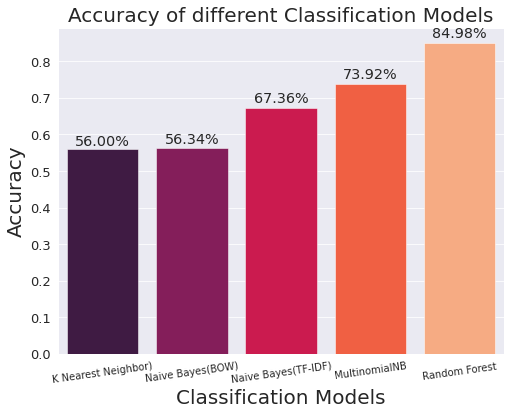

In [120]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("K Nearest Neighbor)")
mylist.append(acc2)
mylist2.append("Naive Bayes(BOW)")
mylist.append(acc3)
mylist2.append("Naive Bayes(TF-IDF)")
mylist.append(acc4)
mylist2.append("MultinomialNB")
mylist.append(acc5)
mylist2.append("Random Forest")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()